# Control Flow: Conditional Statements and Loops

#### Writing a program that implements a simple trading strategy

In [91]:
import yfinance as yf

# Function that gets stock price using Yahoo Finance API
def get_stock_price(ticker_symbol):
    """
    Function to fetch the most recent closing stock price from Yahoo Finance for a given ticker symbol.

    Parameters:
    ticker_symbol (str): The stock ticker symbol (e.g., "MSFT", "AAPL")

    Returns:
    float: The current stock price of the given ticker symbol. 
    """
    stock = yf.Ticker(ticker_symbol)
    stock_info = stock.history(period="1d") # Get the most recent day's data

    return stock_info['Close'].iloc[0] # Return the closing price of the most recent day


# Main Program
def main():

    # Get input for stock ticker 
    ticker_symbol = input("Enter the ticker symbol of the stock (e.g., MSFT, AAPL): ").upper()
    
    # Fetch the stock price
    try:
        stock_price = get_stock_price(ticker_symbol)
        # Determine if stock price is a High, Medium, or Low-Priced Stock
        if stock_price > 100:
            print(f"{ticker_symbol} stock is a HIGH-Priced Stock at ${round(stock_price, 2)}.") # High-Priced Stock    
        elif stock_price >= 50:
            print(f"{ticker_symbol} stock is a MEDIUM-Priced Stock at ${round(stock_price, 2)}.") # Medium-Priced Stock 
        else:
            print(f"{ticker_symbol} stock is a LOW-Priced Stock at ${round(stock_price, 2)}.") # Low-Priced Stock
    
    except Exception as e:
        print(f"Error fetching stock data for {ticker_symbol}: {e}")

# Running the program
if __name__ == "__main__":
    main()

MSFT stock is a HIGH-Priced Stock at $408.98.


#### Program that calculates compound interest over multiple years using a loop

In [92]:
# Compounding Interest function
def compounding_interest(principal, r, n, t):
    """
    Function to calculate compound interest over multiple years using a loop.

    Parameters: 
    principal (float): The initial amount before any accrued interest.
    r (float): Interest rate (as a decimal, e.g., 0.05 for 5%).
    n (int): Number of times interest is compounded per year.
    t (int): Time in years.

    Returns:
    tuple: (Total amount after interest, Interest accrued)
    """

    # Creating a copy of principle for interest accrued calculation
    principal_1 = principal

    for _ in range(n * t):  # Loop through total compounding periods (loop variable is not needed)
        principal *= (1 + (r / n))  # Apply interest for each period

    total_amount = principal
    interest_amount = total_amount - principal_1  # Compute accrued interest

    return total_amount, interest_amount

# Main program
def main():
    # User input
    principal = float(input("Enter the initial principal amount: "))
    r = float(input("Enter the interest rate (as a decimal, e.g., 0.05 for 5%): "))
    n = int(input("Enter the number of times interest is compounded per year (as a whole number): "))
    t = int(input("Enter the number of years: "))

    # Calling function
    total_amount, interest_amount = compounding_interest(principal, r, n, t)

    # Formatting output
    formatted_total = "${:,.2f}".format(total_amount)
    formatted_interest = "${:,.2f}".format(interest_amount)

    # Printing results
    print(f"""Total interest accrued after {t} years: {formatted_interest}  
Total amount after {t} years: {formatted_total}""")

# Running the program
if __name__ == "__main__":
    main()



Total interest accrued after 5 years: $423.06  
Total amount after 5 years: $1,923.06


#### Program That Analyzes a List of Stock Prices:

- Finds the Highest & Lowest Prices
- Calculates the average price
- Counts how many days the price was above average

In [93]:
# Function that gets stock price using Yahoo Finance API
def stock_price_summary(ticker_symbol):
    """
    Function that analyzes list of closing prices from the past month from Yahoo Finance for a given ticker symbol.

    Parameters:
    ticker_symbol (str): The stock ticker symbol (e.g., "MSFT", "AAPL")

    Returns:
    tuple: (Average stock price, highest stock price, lowest stock price, count of days price was above average)
    """
    stock = yf.download(ticker_symbol, period='1mo', interval='1d')

    if stock.empty:  # Check if the DataFrame is empty (no data fetched)
        return None, None, None, None

    avg_price = stock['Close'].mean().item()  # .item() extracts a scalar value
    min_price = stock['Close'].min().item()
    max_price = stock['Close'].max().item()
    count_abv_avg = (stock['Close'] > avg_price).sum().item()  # Use .item() for int

    return avg_price, min_price, max_price, count_abv_avg

# Main program
def main():
    # Get input for stock ticker
    ticker_symbol = input("Enter the ticker symbol of the stock (e.g., MSFT, AAPL): ").upper()

    # Calling function
    avg_price, min_price, max_price, count_above_avg = stock_price_summary(ticker_symbol)

    if avg_price is None:  # Handle case where data is unavailable
        print(f"Error: No stock data available for {ticker_symbol}. Please check the ticker symbol and try again.")
        return

    # Formatting output
    formatted_avg_price = "${:,.2f}".format(avg_price)
    formatted_min_price = "${:,.2f}".format(min_price)
    formatted_max_price = "${:,.2f}".format(max_price)

    # Printing results
    print(f"\nStock Price Summary for {ticker_symbol}:")
    print(f"Highest Price: {formatted_max_price}")
    print(f"Lowest Price: {formatted_min_price}")
    print(f"Average Price: {formatted_avg_price}")
    print(f"Days Above Average: {count_above_avg}")

# Running the program
if __name__ == "__main__":
    main()



[*********************100%***********************]  1 of 1 completed


Stock Price Summary for AAPL:
Highest Price: $242.70
Lowest Price: $222.64
Average Price: $232.46
Days Above Average: 13


#### Simple trading simulator that:
 
- Loops through daily prices 
- Uses if statements to make buy/sell decisions
- Tracks portfolio value

[*********************100%***********************]  1 of 1 completed


Portfolio Value on 2025-01-08: $10000.00
2025-01-10: Bought 1 share at $236.85
Portfolio Value on 2025-01-10: $10000.00
2025-01-13: Bought 1 share at $234.40
Portfolio Value on 2025-01-13: $9997.55
2025-01-14: Bought 1 share at $233.28
Portfolio Value on 2025-01-14: $9995.31
2025-01-15: Sold 1 share at $237.87
Portfolio Value on 2025-01-15: $10009.08
2025-01-16: Bought 1 share at $228.26
Portfolio Value on 2025-01-16: $9989.86
2025-01-17: Sold 1 share at $229.98
Portfolio Value on 2025-01-17: $9995.02
2025-01-21: Bought 1 share at $222.64
Portfolio Value on 2025-01-21: $9980.34
2025-01-22: Sold 1 share at $223.83
Portfolio Value on 2025-01-22: $9983.91
2025-01-23: Bought 1 share at $223.66
Portfolio Value on 2025-01-23: $9983.57
2025-01-24: Bought 1 share at $222.78
Portfolio Value on 2025-01-24: $9980.93
2025-01-27: Sold 1 share at $229.86
Portfolio Value on 2025-01-27: $10009.25
2025-01-28: Sold 1 share at $238.26
Portfolio Value on 2025-01-28: $10034.45
2025-01-29: Sold 1 share at $

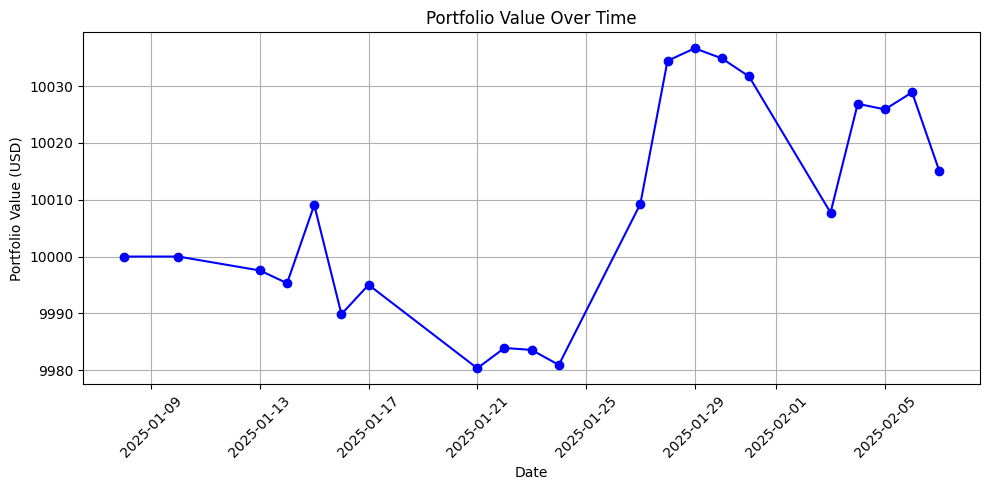

In [88]:
import yfinance as yf
import matplotlib.pyplot as plt

def trading_simulator(ticker_symbol):
    ticker = ticker_symbol
    data = yf.download(ticker, period="1mo", interval="1d")

    if data.empty:
        print(f"No data found for ticker {ticker}.")
        exit()

    # Explicitly select the first (and only) column from the "Close" DataFrame
    prices = data["Close"].iloc[:, 0].tolist()
    dates = data.index.tolist()

    # Continue with the rest of your simulation as before...
    cash = 10000.0
    shares = 0
    portfolio_history = []

    for i in range(1, len(prices)):
        today_price = prices[i]
        yesterday_price = prices[i - 1]
        current_date = dates[i].date()

        if today_price < yesterday_price:
            if cash >= today_price:
                shares += 1
                cash -= today_price
                print(f"{current_date}: Bought 1 share at ${today_price:.2f}")
        elif today_price > yesterday_price:
            if shares > 0:
                shares -= 1
                cash += today_price
                print(f"{current_date}: Sold 1 share at ${today_price:.2f}")

        portfolio_value = cash + shares * today_price
        portfolio_history.append((current_date, portfolio_value))
        print(f"Portfolio Value on {current_date}: ${portfolio_value:.2f}")

    final_portfolio_value = cash + shares * prices[-1]

    return portfolio_history, final_portfolio_value

def portfolio_history_plot(portfolio_history):
    # Unzip the portfolio_history list into two lists: one for dates and one for portfolio values.
    plot_dates, plot_values = zip(*portfolio_history)

    plt.figure(figsize=(10, 5))
    plt.plot(plot_dates, plot_values, marker='o', linestyle='-', color='b')
    plt.title('Portfolio Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (USD)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    ticker = input("Enter the stock ticker symbol: ").strip().upper()
    portfolio_history, final_portfolio_value = trading_simulator(ticker)

    print("\nFinal portfolio value: ${:.2f}".format(final_portfolio_value))
    portfolio_history_plot(portfolio_history)

if __name__ == "__main__":
    main()


#### Program that calculates the total return of an investment with monthly contributions over a period of years

In [94]:
def investment_return():
    """
    Calculates the total return of an investment with monthly contributions over a period of years.
    """
    print("Investment Return Calculator")

    # Get user inputs
    principal = float(input("Enter the initial investment amount ($): "))
    monthly_contribution = float(input("Enter the monthly contribution ($): "))
    annual_interest_rate = float(input("Enter the annual interest rate (in %): ")) / 100
    years = int(input("Enter the number of years: "))
    
    # Constants
    months = years * 12
    total_value = principal
    monthly_interest_rate = annual_interest_rate / 12

    # Loop through each month
    for i in range(months):
        total_value += monthly_contribution  # Add monthly contribution
        total_value *= (1 + monthly_interest_rate)  # Apply interest

    print(f"\nFinal Investment Value after {years} years: ${total_value:.2f}")

# Run the program
investment_return()


Investment Return Calculator

Final Investment Value after 5 years: $40025.26


#### Loan payment calculator that shows the remaining balance after each payment using a loop

In [95]:
def loan_payment_calculator():
    """
    Calculates monthly loan payments and displays the remaining balance after each payment.
    """
    print("Loan Payment Calculator")

    # Get user inputs
    loan_amount = float(input("Enter the loan amount ($): "))
    annual_interest_rate = float(input("Enter the annual interest rate (in %): ")) / 100
    loan_term_years = int(input("Enter the loan term (in years): "))

    # Constants
    monthly_interest_rate = annual_interest_rate / 12
    total_payments = loan_term_years * 12

    # Calculate fixed monthly payment
    if monthly_interest_rate > 0:
        monthly_payment = (loan_amount * monthly_interest_rate * (1 + monthly_interest_rate) ** total_payments) / \
                          ((1 + monthly_interest_rate) ** total_payments - 1)
    else:
        monthly_payment = loan_amount / total_payments

    remaining_balance = loan_amount

    print(f"\nMonthly Payment: ${monthly_payment:.2f}\n")

    # Loop through each month to show remaining balance
    for month in range(1, total_payments + 1):
        interest = remaining_balance * monthly_interest_rate
        principal_paid = monthly_payment - interest
        remaining_balance -= principal_paid
        print(f"Month {month}: Remaining Balance: ${remaining_balance:.2f}")

        # Ensure balance does not go negative due to rounding
        if remaining_balance < 0:
            remaining_balance = 0

    print(f"\nTotal Loan Paid Over {loan_term_years} years: ${monthly_payment * total_payments:.2f}")

# Run the program
loan_payment_calculator()


Loan Payment Calculator

Monthly Payment: $835.44

Month 1: Remaining Balance: $99168.73
Month 2: Remaining Balance: $98337.43
Month 3: Remaining Balance: $97506.09
Month 4: Remaining Balance: $96674.72
Month 5: Remaining Balance: $95843.31
Month 6: Remaining Balance: $95011.87
Month 7: Remaining Balance: $94180.39
Month 8: Remaining Balance: $93348.88
Month 9: Remaining Balance: $92517.33
Month 10: Remaining Balance: $91685.75
Month 11: Remaining Balance: $90854.13
Month 12: Remaining Balance: $90022.48
Month 13: Remaining Balance: $89190.80
Month 14: Remaining Balance: $88359.08
Month 15: Remaining Balance: $87527.33
Month 16: Remaining Balance: $86695.54
Month 17: Remaining Balance: $85863.71
Month 18: Remaining Balance: $85031.86
Month 19: Remaining Balance: $84199.96
Month 20: Remaining Balance: $83368.04
Month 21: Remaining Balance: $82536.07
Month 22: Remaining Balance: $81704.08
Month 23: Remaining Balance: $80872.05
Month 24: Remaining Balance: $80039.98
Month 25: Remaining Ba